# 01- Preparing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning'

In [3]:
df=pd.read_csv(os.path.join(path, 'Data Sets', 'climate_scaled.csv'), index_col=False)

In [4]:
#dropping columns pertaining to the 3 stations not included in the answers dataset
df_drop=df.drop(columns=['GDANSK_cloud_cover','GDANSK_humidity', 'GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max'])

In [5]:
#importing answers dataset
answers=pd.read_csv(os.path.join(path, 'Data Sets', 'Pleasant_Weather_Answers.csv'), index_col=False)

In [6]:
# Drop 'Unnamed: 0' from both DataFrames
df_drop = df_drop.drop(columns=['Unnamed: 0'], errors='ignore')
answers = answers.drop(columns=['Unnamed: 0'], errors='ignore')

In [7]:
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE", "Unnamed: 0", "id"]})
locations.sort()
print(locations) 

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [8]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_drop.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 148)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


# 02- Running the Decision Tree

[Text(0.3683344268354853, 0.9807692307692307, 'x[50] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06354584290763468, 0.9423076923076923, 'x[99] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.017983882700141327, 0.9038461538461539, 'x[20] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.00804371207082883, 0.8653846153846154, 'x[79] <= 0.233\ngini = 0.00

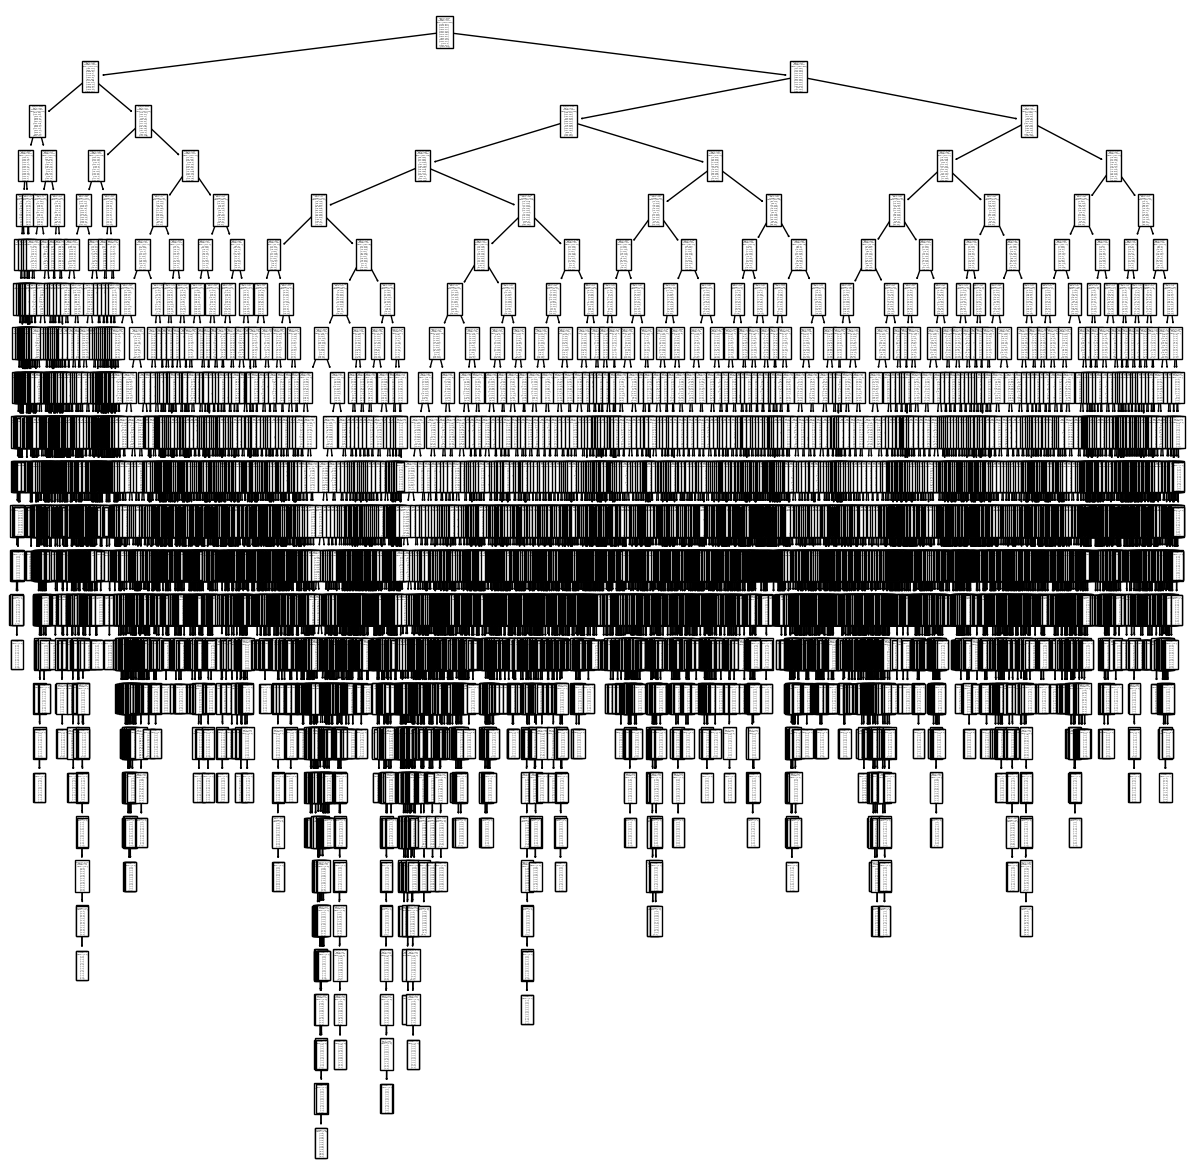

In [16]:
#Run Decision Tree classifier
climate_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climate_dt)

In [17]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = climate_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6055076880946976


In [18]:
# Predict on the test set
y_pred_test = climate_dt.predict(X_test)

# Evaluate test accuracy score using cross-validation on the test set
print('Test accuracy score: ', cross_val_score(climate_dt, X_test, y_test, cv=3, scoring='accuracy').mean())

Test accuracy score:  0.5481010242625332


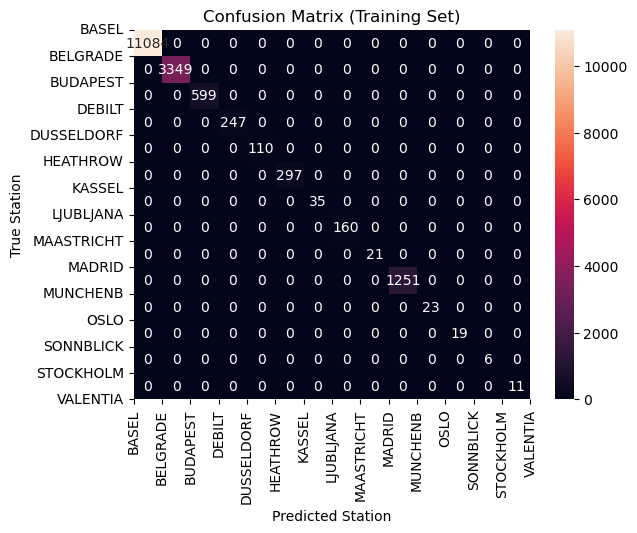

In [20]:
# List of weather station labels
weather_station_labels = [
    'BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA'
]

# Plot the confusion matrix with proper labels
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Training Set)')

# Set the correct number of ticks
ax.set_xticks(range(len(weather_station_labels)))  # Ensure there are 15 ticks on the x-axis
ax.set_yticks(range(len(weather_station_labels)))  # Ensure there are 15 ticks on the y-axis

# Set tick labels
ax.set_xticklabels(weather_station_labels, rotation=90)  # Rotate x-axis labels for readability
ax.set_yticklabels(weather_station_labels, rotation=0)   # Keep y-axis labels vertical

# Show the plot
plt.show()

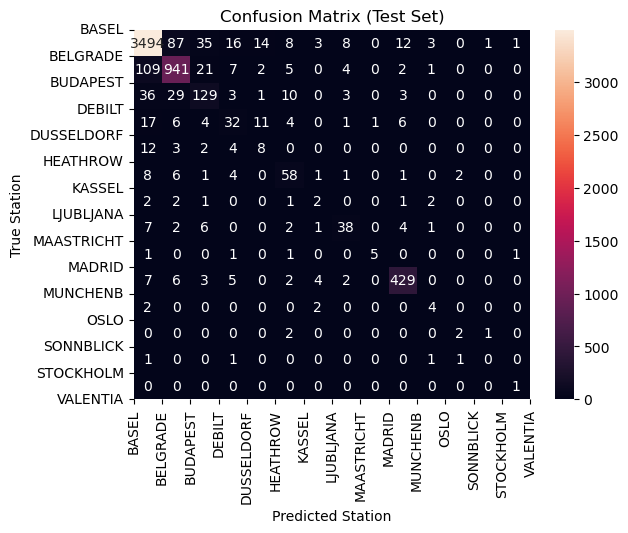

In [21]:
# Ensure y_test and y_pred_test are in the correct format (single-label, not one-hot encoded)
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values
if isinstance(y_pred_test, pd.DataFrame):
    y_pred_test = y_pred_test.values

# Convert from one-hot encoded to single-label format if necessary
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)
if y_pred_test.ndim > 1 and y_pred_test.shape[1] > 1:
    y_pred_test = y_pred_test.argmax(axis=1)

# Create the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the test set confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Test Set)')

# Set the correct number of ticks
ax.set_xticks(range(len(weather_station_labels)))  # Ensure there are 15 ticks on the x-axis
ax.set_yticks(range(len(weather_station_labels)))  # Ensure there are 15 ticks on the y-axis

# Set tick labels with the station names
ax.set_xticklabels(weather_station_labels, rotation=90)  # Rotate x-axis labels for readability
ax.set_yticklabels(weather_station_labels, rotation=0)   # Keep y-axis labels vertical

# Show the plot
plt.show()

# 03- Pruning the decision tree

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Test accuracy after pruning: 0.9330777233652737


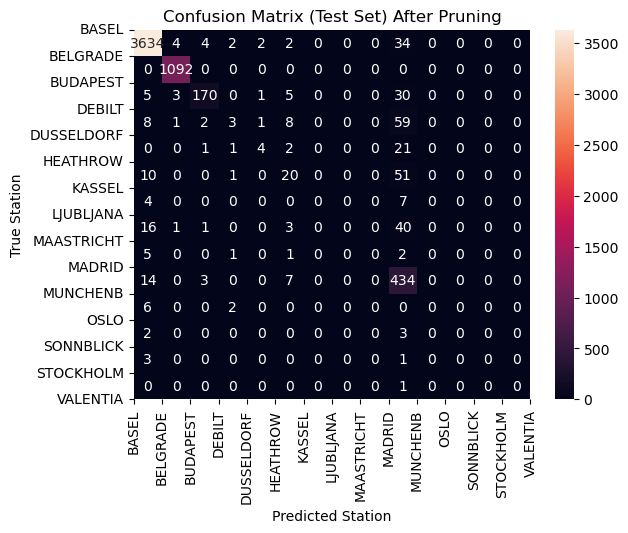

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create a pruned decision tree by setting max_depth, min_samples_split, and min_samples_leaf
climate_dt_pruned = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy', depending on what you're using
    max_depth=5,            # Limit the depth of the tree
    min_samples_split=10,    # Minimum number of samples required to split
    min_samples_leaf=5       # Minimum number of samples required to be a leaf node
)

# Fit the pruned decision tree
climate_dt_pruned.fit(X_train, y_train)

# Predict on the test set
y_pred_test_pruned = climate_dt_pruned.predict(X_test)

# Calculate the new test accuracy
test_accuracy_pruned = cross_val_score(climate_dt_pruned, X_test, y_test, cv=3, scoring='accuracy').mean()
print(f'Test accuracy after pruning: {test_accuracy_pruned}')

# Generate confusion matrix for the pruned model
cm_test_pruned = confusion_matrix(y_test, y_pred_test_pruned)

# Plot the confusion matrix for the pruned model
ax = plt.subplot()
sns.heatmap(cm_test_pruned, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the test set confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Test Set) After Pruning')

# Set the correct number of ticks and labels
ax.set_xticks(range(len(weather_station_labels)))  
ax.set_yticks(range(len(weather_station_labels)))  
ax.set_xticklabels(weather_station_labels, rotation=90)  
ax.set_yticklabels(weather_station_labels, rotation=0)

# Show the plot
plt.show()

Training accuracy after pruning: 0.9319078728395976


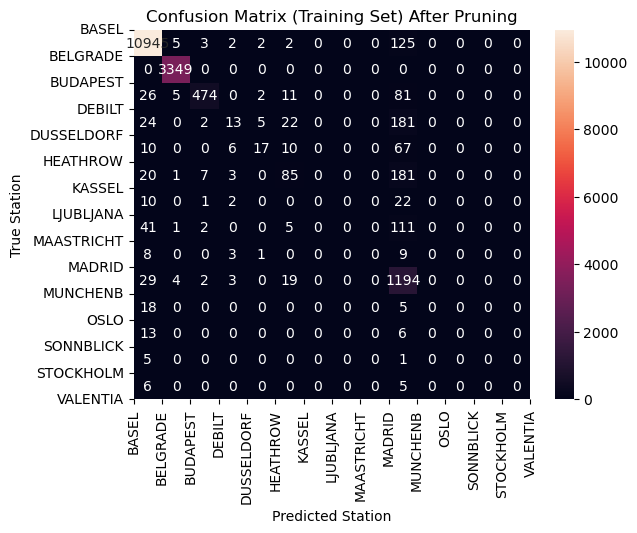

In [23]:
# Predict on the training set using the pruned decision tree
y_pred_train_pruned = climate_dt_pruned.predict(X_train)

# Calculate the training accuracy
train_accuracy_pruned = cross_val_score(climate_dt_pruned, X_train, y_train, cv=3, scoring='accuracy').mean()
print(f'Training accuracy after pruning: {train_accuracy_pruned}')

# Create the confusion matrix for the training set
cm_train_pruned = confusion_matrix(y_train, y_pred_train_pruned)

# Plot the confusion matrix for the training set
ax = plt.subplot()
sns.heatmap(cm_train_pruned, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the training set confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Training Set) After Pruning')

# Set the correct number of ticks and labels
ax.set_xticks(range(len(weather_station_labels)))  
ax.set_yticks(range(len(weather_station_labels)))  
ax.set_xticklabels(weather_station_labels, rotation=90)  
ax.set_yticklabels(weather_station_labels, rotation=0)

# Show the plot
plt.show()

In [24]:
from sklearn.metrics import classification_report, accuracy_score

# Get unique labels from y_test (the actual classes present in the test set)
unique_labels = sorted(list(set(y_test)))

# Predict on the test set using the pruned decision tree
y_pred_test_pruned = climate_dt_pruned.predict(X_test)

# Print classification report for test set, using the unique labels in y_test
print("Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test_pruned, labels=unique_labels, target_names=[weather_station_labels[i] for i in unique_labels]))

# Calculate overall accuracy for the test set
test_accuracy_pruned = accuracy_score(y_test, y_pred_test_pruned)
print(f'Test Accuracy: {test_accuracy_pruned}\n')

# If you want to see these metrics for the training set as well:
y_pred_train_pruned = climate_dt_pruned.predict(X_train)

# Get unique labels from y_train (the actual classes present in the training set)
unique_train_labels = sorted(list(set(y_train)))

# Print classification report for the training set
print("Classification Report (Training Set):\n")
print(classification_report(y_train, y_pred_train_pruned, labels=unique_train_labels, target_names=[weather_station_labels[i] for i in unique_train_labels]))

# Calculate overall accuracy for the training set
train_accuracy_pruned = accuracy_score(y_train, y_pred_train_pruned)
print(f'Training Accuracy: {train_accuracy_pruned}\n')



Classification Report (Test Set):

              precision    recall  f1-score   support

       BASEL       0.98      0.99      0.98      3682
    BELGRADE       0.99      1.00      1.00      1092
    BUDAPEST       0.94      0.79      0.86       214
      DEBILT       0.30      0.04      0.07        82
  DUSSELDORF       0.50      0.14      0.22        29
    HEATHROW       0.42      0.24      0.31        82
      KASSEL       0.00      0.00      0.00        11
   LJUBLJANA       0.00      0.00      0.00        61
  MAASTRICHT       0.00      0.00      0.00         9
      MADRID       0.64      0.95      0.76       458
    MUNCHENB       0.00      0.00      0.00         8
        OSLO       0.00      0.00      0.00         5
   STOCKHOLM       0.00      0.00      0.00         4
    VALENTIA       0.00      0.00      0.00         1

    accuracy                           0.93      5738
   macro avg       0.34      0.30      0.30      5738
weighted avg       0.92      0.93      0.92  

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metr

# 04- Let's try random undersampling

Class distribution after undersampling: [6 6 6 6 6 6 6 6 6 6 6 6 0 6 6]
Classification Report (Test Set) After Undersampling:

              precision    recall  f1-score   support

       BASEL       0.74      0.33      0.46      3682
    BELGRADE       0.24      0.22      0.23      1092
    BUDAPEST       0.06      0.18      0.09       214
      DEBILT       0.00      0.00      0.00        82
  DUSSELDORF       0.00      0.10      0.01        29
    HEATHROW       0.00      0.00      0.00        82
      KASSEL       0.00      0.00      0.00        11
   LJUBLJANA       0.02      0.11      0.03        61
  MAASTRICHT       0.00      0.00      0.00         9
      MADRID       0.19      0.25      0.22       458
    MUNCHENB       0.02      0.50      0.04         8
        OSLO       0.01      0.20      0.02         5
   STOCKHOLM       0.01      0.25      0.02         4
    VALENTIA       0.00      1.00      0.01         1

    accuracy                           0.28      5738
   macr

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


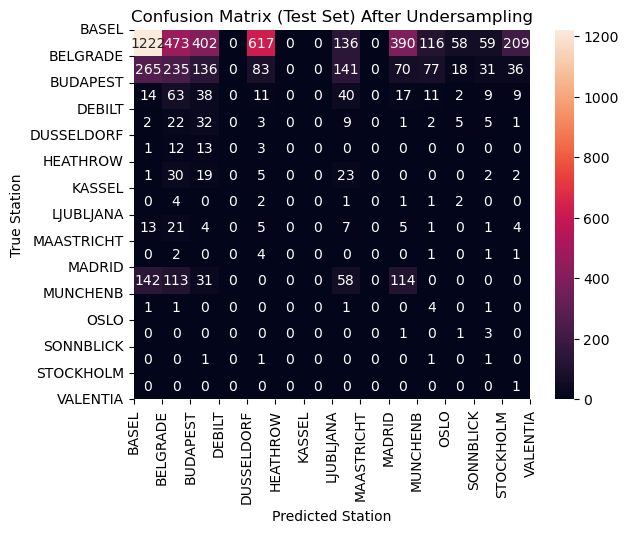

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Combine X_train and y_train into one dataset for undersampling
X_train_combined = X_train.copy()
X_train_combined['label'] = y_train

# Define undersampler with a desired ratio (we'll aim for balancing all classes)
undersampler = RandomUnderSampler(random_state=42)

# Separate features and labels after undersampling
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Check the new class distribution after undersampling
print("Class distribution after undersampling:", np.bincount(y_resampled))

# Create a new pruned decision tree model
climate_dt_undersampled = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy', depending on what you're using
    max_depth=5,            # Limit the depth of the tree
    min_samples_split=10,    # Minimum number of samples required to split
    min_samples_leaf=5       # Minimum number of samples required to be a leaf node
)

# Train the model on the undersampled data
climate_dt_undersampled.fit(X_resampled, y_resampled)

# Evaluate the model on the original test set
y_pred_test_undersampled = climate_dt_undersampled.predict(X_test)

# Get unique labels from the test set (actual classes present in y_test)
unique_labels = sorted(list(set(y_test)))

# Print the classification report for the undersampled model
print("Classification Report (Test Set) After Undersampling:\n")
print(classification_report(y_test, y_pred_test_undersampled, labels=unique_labels, target_names=[weather_station_labels[i] for i in unique_labels]))

# Calculate test accuracy
test_accuracy_undersampled = accuracy_score(y_test, y_pred_test_undersampled)
print(f'Test Accuracy after undersampling: {test_accuracy_undersampled}\n')

# Confusion matrix for the test set after undersampling
cm_test_undersampled = confusion_matrix(y_test, y_pred_test_undersampled)

# Plot confusion matrix for the test set
ax = plt.subplot()
sns.heatmap(cm_test_undersampled, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the test set confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Test Set) After Undersampling')

# Set the correct number of ticks and labels
ax.set_xticks(range(len(weather_station_labels)))  
ax.set_yticks(range(len(weather_station_labels)))  
ax.set_xticklabels(weather_station_labels, rotation=90)  
ax.set_yticklabels(weather_station_labels, rotation=0)

plt.show()



# 05- Synthetic Minority Oversampling Technique (SMOTE)

Classification Report (Test Set) After SMOTE:

              precision    recall  f1-score   support

       BASEL       0.89      0.57      0.70      3682
    BELGRADE       0.95      0.91      0.93      1092
    BUDAPEST       0.45      0.80      0.57       214
      DEBILT       0.30      0.28      0.29        82
  DUSSELDORF       0.04      0.41      0.07        29
    HEATHROW       0.18      0.13      0.15        82
      KASSEL       0.00      0.00      0.00        11
   LJUBLJANA       0.33      0.67      0.45        61
  MAASTRICHT       0.12      0.78      0.21         9
      MADRID       0.15      0.27      0.19       458
    MUNCHENB       0.09      0.38      0.15         8
        OSLO       0.00      0.00      0.00         5
   STOCKHOLM       0.01      0.75      0.01         4
    VALENTIA       0.33      1.00      0.50         1

    accuracy                           0.61      5738
   macro avg       0.27      0.50      0.30      5738
weighted avg       0.80      0.61

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


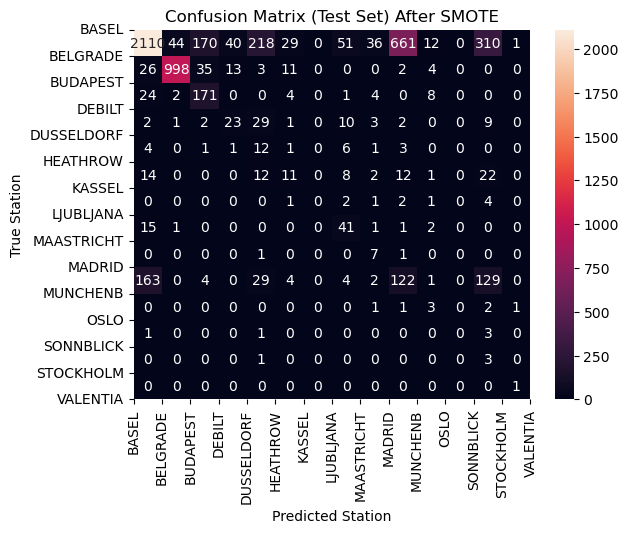

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (X_train and y_train)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train a decision tree model on the SMOTE-resampled dataset
climate_dt_smote = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy', depending on what you're using
    max_depth=5,            # Limit the depth of the tree
    min_samples_split=10,    # Minimum number of samples required to split
    min_samples_leaf=5       # Minimum number of samples required to be a leaf node
)

# Fit the model on the resampled data
climate_dt_smote.fit(X_resampled, y_resampled)

# Step 3: Evaluate the model on the original test set
y_pred_test_smote = climate_dt_smote.predict(X_test)

# Get unique labels from the test set (actual classes present in y_test)
unique_labels = sorted(list(set(y_test)))

# Step 4: Print the classification report for the test set after SMOTE
print("Classification Report (Test Set) After SMOTE:\n")
print(classification_report(y_test, y_pred_test_smote, labels=unique_labels, target_names=[weather_station_labels[i] for i in unique_labels]))

# Step 5: Calculate test accuracy
test_accuracy_smote = accuracy_score(y_test, y_pred_test_smote)
print(f'Test Accuracy after SMOTE: {test_accuracy_smote}\n')

# Step 6: Plot the confusion matrix for the test set after SMOTE
cm_test_smote = confusion_matrix(y_test, y_pred_test_smote)

ax = plt.subplot()
sns.heatmap(cm_test_smote, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the test set confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Test Set) After SMOTE')

# Set the correct number of ticks and labels
ax.set_xticks(range(len(weather_station_labels)))  
ax.set_yticks(range(len(weather_station_labels)))  
ax.set_xticklabels(weather_station_labels, rotation=90)  
ax.set_yticklabels(weather_station_labels, rotation=0)

plt.show()


# 06- SMOTE with Class Weighting

Classification Report (Test Set) After SMOTE with Class Weighting:

              precision    recall  f1-score   support

       BASEL       0.89      0.57      0.70      3682
    BELGRADE       0.95      0.91      0.93      1092
    BUDAPEST       0.45      0.80      0.57       214
      DEBILT       0.30      0.28      0.29        82
  DUSSELDORF       0.04      0.41      0.07        29
    HEATHROW       0.18      0.13      0.15        82
      KASSEL       0.00      0.00      0.00        11
   LJUBLJANA       0.33      0.67      0.45        61
  MAASTRICHT       0.12      0.78      0.21         9
      MADRID       0.15      0.27      0.19       458
    MUNCHENB       0.09      0.38      0.15         8
        OSLO       0.00      0.00      0.00         5
   STOCKHOLM       0.01      0.75      0.01         4
    VALENTIA       0.33      1.00      0.50         1

    accuracy                           0.61      5738
   macro avg       0.27      0.50      0.30      5738
weighted avg

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


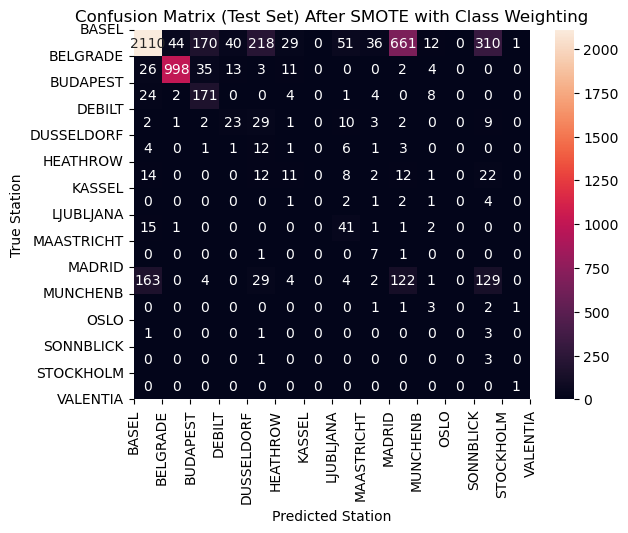

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (X_train and y_train)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train a decision tree model with class weights on the SMOTE-resampled dataset
# 'balanced' class_weight automatically adjusts weights inversely proportional to class frequencies
climate_dt_smote_weighted = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,                # Limit the depth of the tree
    min_samples_split=10,        # Minimum number of samples required to split
    min_samples_leaf=5,          # Minimum number of samples required to be a leaf node
    class_weight='balanced'      # Apply class weighting
)

# Fit the model on the resampled data
climate_dt_smote_weighted.fit(X_resampled, y_resampled)

# Step 3: Evaluate the model on the original test set
y_pred_test_smote_weighted = climate_dt_smote_weighted.predict(X_test)

# Get unique labels from the test set (actual classes present in y_test)
unique_labels = sorted(list(set(y_test)))

# Step 4: Print the classification report for the test set after SMOTE and class weighting
print("Classification Report (Test Set) After SMOTE with Class Weighting:\n")
print(classification_report(y_test, y_pred_test_smote_weighted, labels=unique_labels, target_names=[weather_station_labels[i] for i in unique_labels]))

# Step 5: Calculate test accuracy
test_accuracy_smote_weighted = accuracy_score(y_test, y_pred_test_smote_weighted)
print(f'Test Accuracy after SMOTE with Class Weighting: {test_accuracy_smote_weighted}\n')

# Step 6: Plot the confusion matrix for the test set after SMOTE and class weighting
cm_test_smote_weighted = confusion_matrix(y_test, y_pred_test_smote_weighted)

ax = plt.subplot()
sns.heatmap(cm_test_smote_weighted, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the test set confusion matrix
ax.set_xlabel('Predicted Station')
ax.set_ylabel('True Station')
ax.set_title('Confusion Matrix (Test Set) After SMOTE with Class Weighting')

# Set the correct number of ticks and labels
ax.set_xticks(range(len(weather_station_labels)))  
ax.set_yticks(range(len(weather_station_labels)))  
ax.set_xticklabels(weather_station_labels, rotation=90)  
ax.set_yticklabels(weather_station_labels, rotation=0)

plt.show()


In [ ]:
#It looks like the second iteration wins out- it had the highest overall accuracy, and while it wasn't perfect, it can still be useful for weather predictions on a large scale.

# 07- Artifical Neural Networks (ANNs)

In [28]:
import operator
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [29]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [30]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7874157564489891
0.7764029278494249


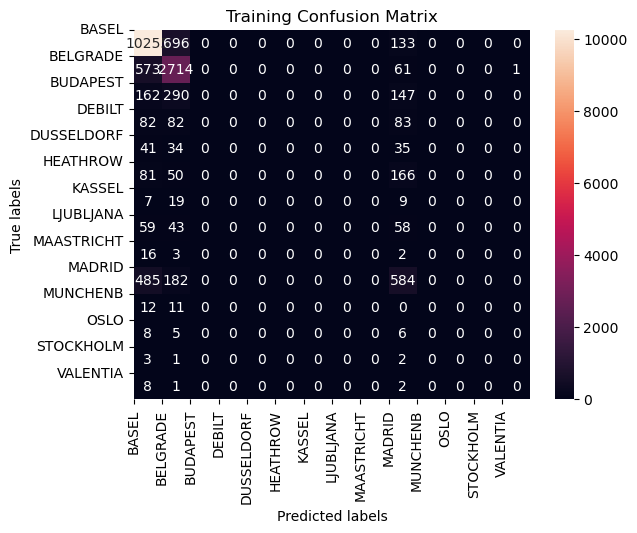

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the station names (replace with the actual station names if different)
labels = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
          'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
          'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Get the unique labels from the training data
unique_labels = sorted(list(set(y_train)))

# Confusion matrix for training data
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# Labels, title, and ticks for the confusion matrix
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training Confusion Matrix')

# Set tick labels to the unique class labels
ax.set_xticks(range(len(unique_labels)))
ax.set_yticks(range(len(unique_labels)))

# Use only the labels that match the actual classes present in y_train
ax.set_xticklabels([labels[i] for i in unique_labels], rotation=90, fontsize=10)  
ax.set_yticklabels([labels[i] for i in unique_labels], rotation=0, fontsize=10)

plt.show()



In [34]:
from sklearn.metrics import classification_report

# Generate classification report for the training set
print("Classification Report (Training Set):\n")
print(classification_report(y_train, y_pred, target_names=[labels[i] for i in unique_labels]))


Classification Report (Training Set):

              precision    recall  f1-score   support

       BASEL       0.87      0.93      0.90     11084
    BELGRADE       0.66      0.81      0.73      3349
    BUDAPEST       0.00      0.00      0.00       599
      DEBILT       0.00      0.00      0.00       247
  DUSSELDORF       0.00      0.00      0.00       110
    HEATHROW       0.00      0.00      0.00       297
      KASSEL       0.00      0.00      0.00        35
   LJUBLJANA       0.00      0.00      0.00       160
  MAASTRICHT       0.00      0.00      0.00        21
      MADRID       0.45      0.47      0.46      1251
    MUNCHENB       0.00      0.00      0.00        23
        OSLO       0.00      0.00      0.00        19
   STOCKHOLM       0.00      0.00      0.00         6
    VALENTIA       0.00      0.00      0.00        11

    accuracy                           0.79     17212
   macro avg       0.14      0.16      0.15     17212
weighted avg       0.72      0.79      0.

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 08- Running ANN with Unscaled Data

In [35]:
climate_unscaled=pd.read_csv(os.path.join(path, 'Data Sets', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col=False)

In [36]:
#dropping columns pertaining to the 3 stations not included in the answers dataset
climate_drop=climate_unscaled.drop(columns=['GDANSK_cloud_cover','GDANSK_humidity', 'GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max'])

In [37]:
# Drop 'Unnamed: 0' from both DataFrames
climate_drop = climate_drop.drop(columns=['Unnamed: 0'], errors='ignore')

In [38]:
locations = list({x.split("_")[0] for x in climate_drop.columns if x not in ["MONTH", "DATE", "Unnamed: 0", "id"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [42]:
# Split the data into training and test sets (unscaled)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
mlp_unscaled = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
mlp_unscaled.fit(X_train_unscaled, y_train)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [44]:
y_pred_test_unscaled = mlp_unscaled.predict(X_test_unscaled)

In [45]:
print(y_test.shape)
print(y_pred_test_unscaled.shape)

(4590, 15)
(4590, 15)


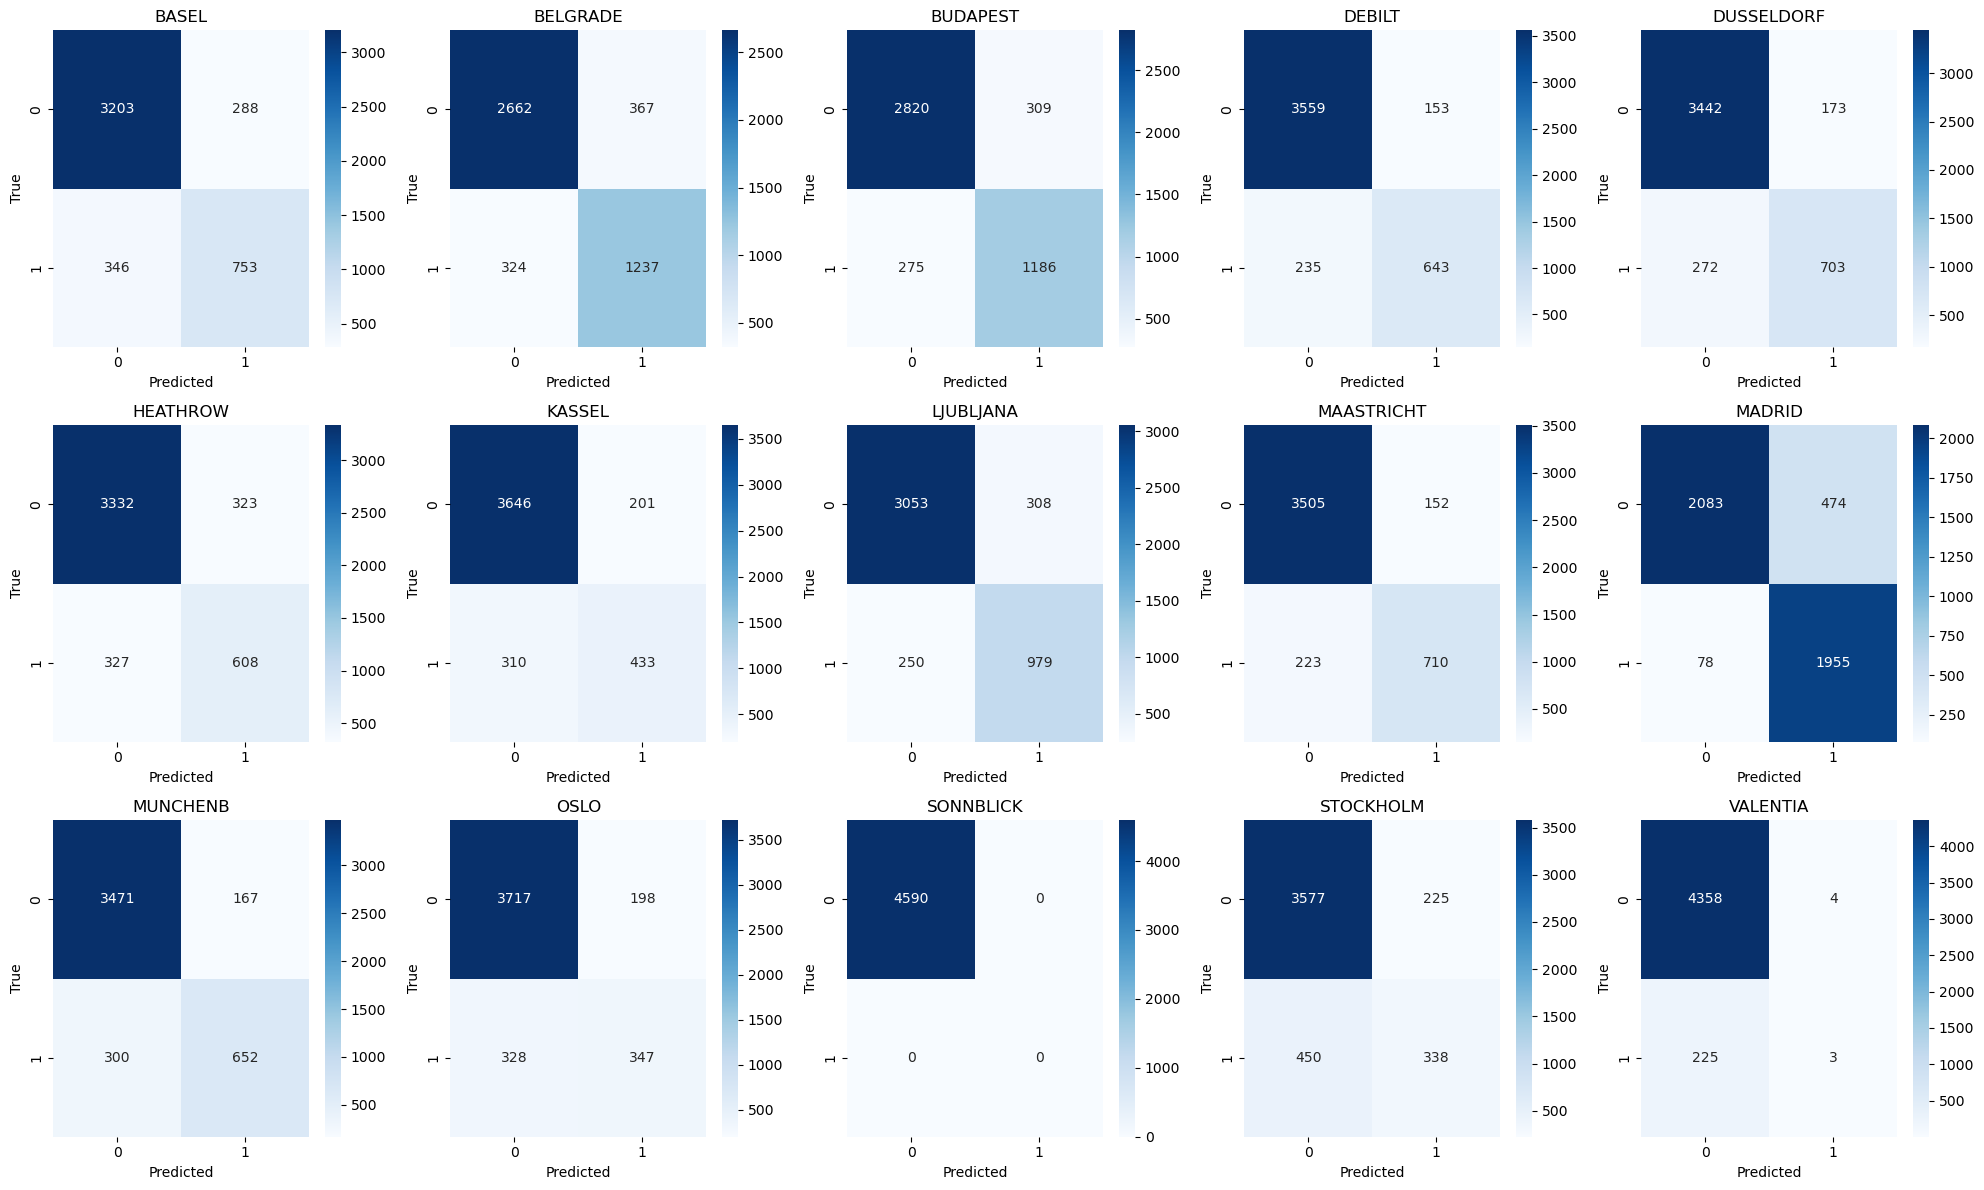

Classification Report (Test Set - Unscaled):

              precision    recall  f1-score   support

       BASEL       0.72      0.69      0.70      1099
    BELGRADE       0.77      0.79      0.78      1561
    BUDAPEST       0.79      0.81      0.80      1461
      DEBILT       0.81      0.73      0.77       878
  DUSSELDORF       0.80      0.72      0.76       975
    HEATHROW       0.65      0.65      0.65       935
      KASSEL       0.68      0.58      0.63       743
   LJUBLJANA       0.76      0.80      0.78      1229
  MAASTRICHT       0.82      0.76      0.79       933
      MADRID       0.80      0.96      0.88      2033
    MUNCHENB       0.80      0.68      0.74       952
        OSLO       0.64      0.51      0.57       675
   SONNBLICK       0.00      0.00      0.00         0
   STOCKHOLM       0.60      0.43      0.50       788
    VALENTIA       0.43      0.01      0.03       228

   micro avg       0.76      0.73      0.74     14490
   macro avg       0.67      0.61 

In [46]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate multilabel confusion matrices
cm_test_unscaled = multilabel_confusion_matrix(y_test, y_pred_test_unscaled)

# List of station names (replace with actual station names if different)
station_names = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Define the number of rows and columns for the grid
n_labels = cm_test_unscaled.shape[0]
n_cols = 5  # Set how many confusion matrices you want per row (adjust as needed)
n_rows = (n_labels + n_cols - 1) // n_cols  # Calculate how many rows needed based on number of labels

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each confusion matrix on a subplot and use the station names
for i, cm in enumerate(cm_test_unscaled):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{station_names[i]}')  # Set the title to the station name
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Generate classification report for the unscaled data
print("Classification Report (Test Set - Unscaled):\n")
print(classification_report(y_test, y_pred_test_unscaled, target_names=station_names, zero_division=0))


# 09- Unscaled data cont'd, with different configurations

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define different configurations to test
configs = [
    {"layers": (5, 5), "iterations": 200, "tol": 0.0001},
    {"layers": (10, 10), "iterations": 500, "tol": 0.0001},
    {"layers": (50, 50), "iterations": 500, "tol": 0.0001},
    {"layers": (100, 50, 25), "iterations": 500, "tol": 0.0001},
    {"layers": (100, 50, 25), "iterations": 1000, "tol": 0.00001},
    {"layers": (100, 50, 25), "iterations": 1000, "tol": 0.001},
]

results = []

# Loop through each configuration and test the model
for config in configs:
    print(f"Testing: {config}")
    
    # Create the model with the current configuration
    mlp_unscaled = MLPClassifier(hidden_layer_sizes=config['layers'], 
                                  max_iter=config['iterations'], 
                                  tol=config['tol'])
    
    # Fit the model
    mlp_unscaled.fit(X_train_unscaled, y_train)
    
    # Make predictions
    y_pred_train = mlp_unscaled.predict(X_train_unscaled)
    y_pred_test = mlp_unscaled.predict(X_test_unscaled)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Record the results
    results.append({
        "layers": config['layers'],
        "iterations": config['iterations'],
        "tol": config['tol'],
        "train_accuracy": train_acc,
        "test_accuracy": test_acc
    })

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display results
results_df

Testing: {'layers': (5, 5), 'iterations': 200, 'tol': 0.0001}
Testing: {'layers': (10, 10), 'iterations': 500, 'tol': 0.0001}
Testing: {'layers': (50, 50), 'iterations': 500, 'tol': 0.0001}
Testing: {'layers': (100, 50, 25), 'iterations': 500, 'tol': 0.0001}
Testing: {'layers': (100, 50, 25), 'iterations': 1000, 'tol': 1e-05}
Testing: {'layers': (100, 50, 25), 'iterations': 1000, 'tol': 0.001}


,layers,iterations,tol,train_accuracy,test_accuracy
0,"(5, 5)",200,0.00010,0.409967,0.421569
1,"(10, 10)",500,0.00010,0.409205,0.419390
2,"(50, 50)",500,0.00010,0.372767,0.377124
3,"(100, 50, 25)",500,0.00010,0.485730,0.487582
4,"(100, 50, 25)",1000,0.00001,0.407516,0.420697
5,"(100, 50, 25)",1000,0.00100,0.408007,0.419826


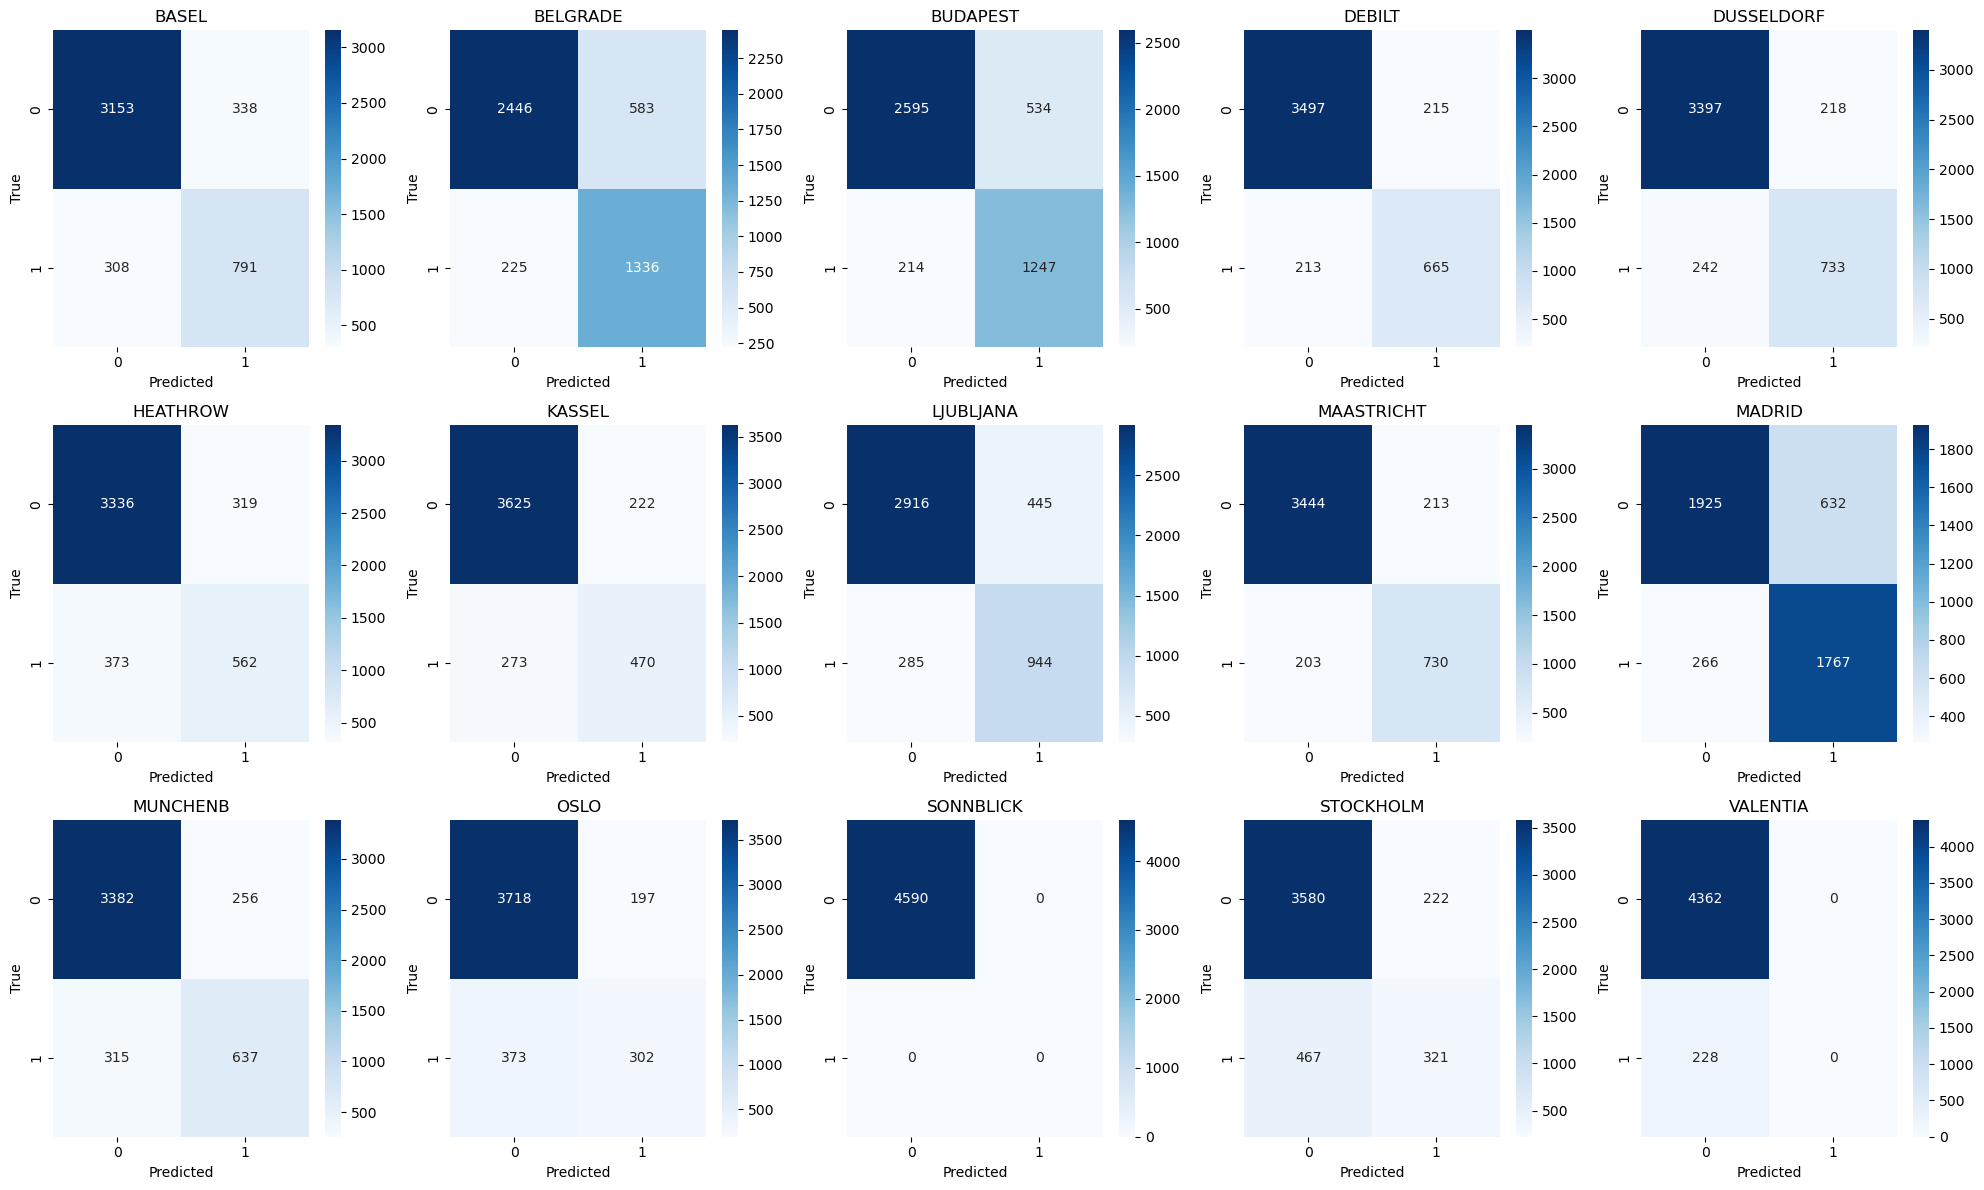

In [49]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the best-performing model
mlp_best = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, tol=0.0001)

# Train the model with the best configuration
mlp_best.fit(X_train_unscaled, y_train)

# Make predictions using the test set
y_pred_test_best = mlp_best.predict(X_test_unscaled)

# Generate multilabel confusion matrices
cm_test_best = multilabel_confusion_matrix(y_test, y_pred_test_best)

# List of station names (replace with actual station names)
station_names = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Define the number of rows and columns for the grid
n_labels = cm_test_best.shape[0]
n_cols = 5  # Number of columns for the grid
n_rows = (n_labels + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a grid of subplots to display confusion matrices for all labels
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot each confusion matrix for each station label
for i, cm in enumerate(cm_test_best):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{station_names[i]}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# 10- ANN using scaled data, with multiple configurations

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# Define different configurations to test on scaled data
scaled_configs = [
    {"layers": (5, 5), "iterations": 200, "tol": 0.0001},
    {"layers": (10, 10), "iterations": 500, "tol": 0.0001},
    {"layers": (50, 50), "iterations": 500, "tol": 0.0001},
    {"layers": (100, 50, 25), "iterations": 500, "tol": 0.0001},  # Best architecture from unscaled data
    {"layers": (100, 50, 25), "iterations": 1000, "tol": 0.00001},  # Test higher iterations
    {"layers": (100, 50, 25), "iterations": 1000, "tol": 0.001},  # Test different tolerance
]

scaled_results = []

# Loop through each configuration and test the model on scaled data
for config in scaled_configs:
    print(f"Testing: {config}")
    
    # Create the model with the current configuration
    mlp_scaled = MLPClassifier(hidden_layer_sizes=config['layers'], 
                               max_iter=config['iterations'], 
                               tol=config['tol'])
    
    # Fit the model on scaled data
    mlp_scaled.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train_scaled = mlp_scaled.predict(X_train_scaled)
    y_pred_test_scaled = mlp_scaled.predict(X_test_scaled)
    
    # Calculate accuracy
    train_acc_scaled = accuracy_score(y_train, y_pred_train_scaled)
    test_acc_scaled = accuracy_score(y_test, y_pred_test_scaled)
    
    # Record the results
    scaled_results.append({
        "layers": config['layers'],
        "iterations": config['iterations'],
        "tol": config['tol'],
        "train_accuracy": train_acc_scaled,
        "test_accuracy": test_acc_scaled
    })

# Convert scaled results to a DataFrame for easy comparison
scaled_results_df = pd.DataFrame(scaled_results)

# Display results
scaled_results_df

Testing: {'layers': (5, 5), 'iterations': 200, 'tol': 0.0001}


C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing: {'layers': (10, 10), 'iterations': 500, 'tol': 0.0001}


C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing: {'layers': (50, 50), 'iterations': 500, 'tol': 0.0001}
Testing: {'layers': (100, 50, 25), 'iterations': 500, 'tol': 0.0001}
Testing: {'layers': (100, 50, 25), 'iterations': 1000, 'tol': 1e-05}
Testing: {'layers': (100, 50, 25), 'iterations': 1000, 'tol': 0.001}


,layers,iterations,tol,train_accuracy,test_accuracy
0,"(5, 5)",200,0.00010,0.465196,0.478649
1,"(10, 10)",500,0.00010,0.563181,0.570588
2,"(50, 50)",500,0.00010,0.782843,0.637037
3,"(100, 50, 25)",500,0.00010,0.893301,0.627233
4,"(100, 50, 25)",1000,0.00001,0.866503,0.611111
5,"(100, 50, 25)",1000,0.00100,0.894826,0.616558


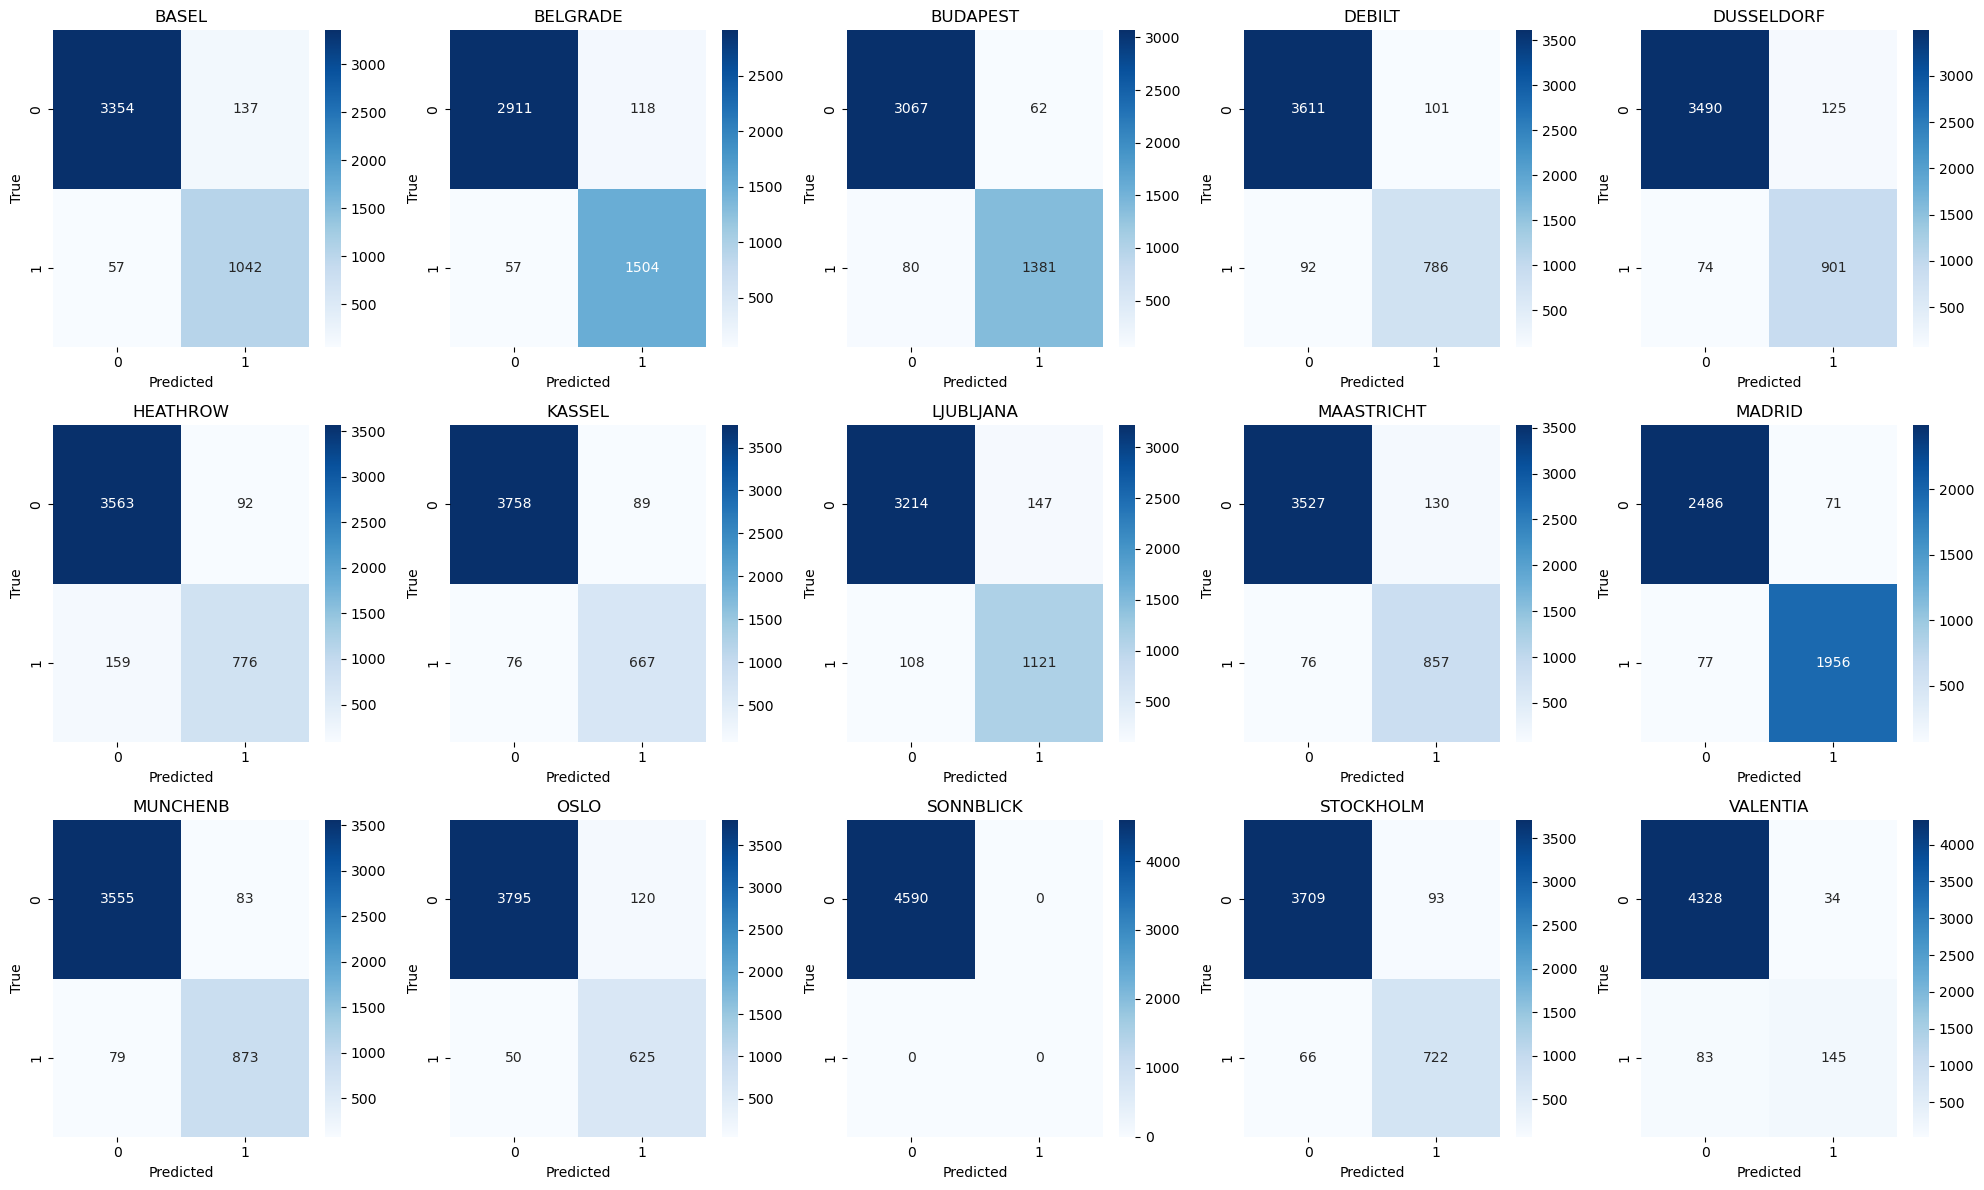

In [52]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the best-performing model configuration
mlp_best_scaled = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, tol=0.0001)

# Fit the model with the scaled data
mlp_best_scaled.fit(X_train_scaled, y_train)

# Make predictions using the test set
y_pred_test_best_scaled = mlp_best_scaled.predict(X_test_scaled)

# Generate multilabel confusion matrices
cm_test_best_scaled = multilabel_confusion_matrix(y_test, y_pred_test_best_scaled)

# List of station names (replace with actual station names)
station_names = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Define the number of rows and columns for the grid
n_labels = cm_test_best_scaled.shape[0]
n_cols = 5  # Number of columns for the grid
n_rows = (n_labels + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a grid of subplots to display confusion matrices for all labels
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot each confusion matrix for each station label
for i, cm in enumerate(cm_test_best_scaled):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{station_names[i]}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()